In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
dataset = load_wine()
# print(dataset.DESCR)

In [3]:
print(dataset.target_names)
print(dataset.target)

['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
print(dataset.feature_names)
print(dataset.data)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [5]:
"""Prepare explanatory variable as DataFrame in pandas"""
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
"""Add the target variable to df"""
df["target"] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


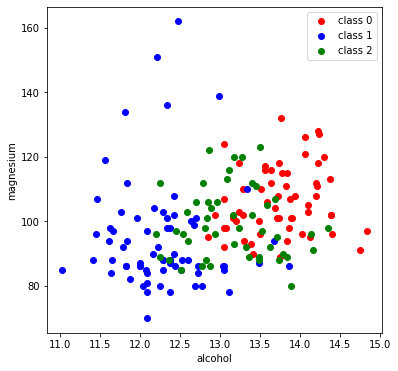

In [6]:
"""
Visualize the dataset
"""
show_data = True # True or False
if show_data:
    plt.figure(figsize=(6, 6))
    # class 0
    plt.scatter(df[df['target']==0]['alcohol'],
                df[df['target']==0]['magnesium'],
                label='class 0', color='red')
    # class 1
    plt.scatter(df[df['target']==1]['alcohol'],
                df[df['target']==1]['magnesium'],
                label='class 1', color='blue')
    # class 2
    plt.scatter(df[df['target']==2]['alcohol'],
                df[df['target']==2]['magnesium'],
                label='class 2', color='green')
    plt.xlabel("alcohol")
    plt.ylabel("magnesium")
    plt.legend()
    plt.show()

In [7]:
"""Prepare the explanatory and target variables"""
x = df.drop(columns=['target'])
y = df['target']

In [8]:
"""Perform the standardization"""
sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
x_std = sscaler.transform(x)

In [9]:
"""Split the dataset"""
x_train, x_val, y_train, y_val = train_test_split(x_std, y, test_size=0.3, random_state=20210622)

In [10]:
"""Naive Bayes"""
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf = clf.fit(x_train, y_train)
y_val_pred = clf.predict(x_val)

print(accuracy_score(y_val, y_val_pred))

0.9814814814814815


In [11]:
"""PCA: principal component analysis"""
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_std)
print(x_pca.shape)

(178, 3)


In [12]:
"""Visualize by Plotly"""
import plotly.express as px

fig = plt.figure(figsize=(10, 10))
fig = px.scatter_3d(x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2], text=y, color=y)
fig.show()

<Figure size 720x720 with 0 Axes>

In [25]:
###-- Google Driveに同期 --###
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
"""Ref. https://plotly.com/python/plotly-express/"""
import plotly.express as px

fig= px.scatter_3d(x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2], color=y)
fig.update_layout(height=600, width=900)
# fig.write_html('drive/My Drive/plotly.html', auto_open=False)
fig.show()

In [49]:
import plotly.graph_objects as go

dg = pd.DataFrame(x_pca)
dg.columns = ['pca1', 'pca2', 'pca3']
dg['WineClasses'] = np.array(df['target'], dtype=np.object)
 
fig = px.scatter_3d(dg, x='pca1', y='pca2', z='pca3',color='WineClasses')
fig.write_html('drive/My Drive/plotly.html', auto_open=False)
# fig.write_image('drive/My Drive/plotly.png')
fig.show()

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=y,
        colorscale='Viridis',
    )
                                   )])
fig.show()

In [ ]:
"""
Ref. plotly documentation

import plotly.express as px
df = px.data.election()
fig = px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()
"""